# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)  
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load Customer Churn Data](#2.4_Load)  
  * [2.5 Explore The Data](#2.5_Explore_Data)  
    * [2.5.1 Number Of Missing Values By Column](#2.5.1_Missing_values_)   
    * [2.5.2 Categorical Features](#2.5.2_Categorical_Features)   
      * [2.5.2.1 Duplicate Values](#2.5.2.1_Duplicate)  
        * [2.5.2.1.1 Duplicate CustomerIDs](#2.5.2.1.1_CustomerID) 
        * [2.5.2.1.1 'Streaming TV' and 'Streaming Movies'](#2.5.2.1.2_Streaming)       
    * [2.5.3 Numeric Features](#2.5.3_Numeric_Features) 
      * [2.5.3.1 Numeric Data Summary](#2.5.3.1_Numeric_data_summary)   
      * [2.5.3.2 Distributions Of Feature Values](#2.5.3.2_Distributions_Of_Feature_Values)   
        * [2.5.3.2.1 Senior Citizen](#2.5.3.2.1_Senior_Citizen) 
        * [2.5.3.2.2 Tenure](#2.5.3.2.2_Tenure) 
        * [2.5.3.2.3 Total Charges](#2.5.3.2.3_Total_Charges) 
        * [2.5.3.2.4 Monthly charges vs Total Charges](#2.5.3.2.4_Total_Monthly) 
    * [2.5.4 Missing Values](#2.5.4_Missing_values) 
  * [2.6 Save Data](#2.6_Save_Data) 
  * [2.7 Summary](#2.7_Summary) 

## 2.2 Introduction<a id='2.2_Introduction'></a>

The purpose of this data science project is to analyze customer churn and identify the key factors contributing to it. Customer churn is a critical metric that can significantly impact a company's revenue and growth. This project utilizes a comprehensive dataset that includes customer demographics, service usage details, billing information, and a churn label indicating whether a customer has left the company. By examining these data, the project aims to uncover patterns and characteristics that distinguish churned customers from those who remain. The goal is to build a predictive model that highlights significant predictors of customer churn, thereby providing actionable insights for businesses to develop targeted retention strategies. Understanding these factors will enable the company to enhance their service offerings, tailor their marketing efforts, and ultimately reduce churn rates to foster long-term growth and stability.

## 2.3 Imports<a id='2.3_Imports'></a>

In [242]:
#Import pandas, matplotlib.pyplot, and seaborn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

## 2.4 Load Customer Churn data <a id='2.4_Load'></a>

In [243]:
# the supplied CSV data file is the raw_data directory
churn_data_train = pd.read_csv('../raw_data/train.csv')
churn_data_test = pd.read_csv('../raw_data/test.csv')

# Combine the datasets
churn_data = pd.concat([churn_data_train, churn_data_test], ignore_index=True)

In [244]:
#Call the info method on ski_data to see a summary of the data
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Gender             7043 non-null   int64  
 2   Senior Citizen     7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

Churn is our target variable and the other columns are potential features.

In [245]:
# Train data has churn column but test doesn't have
churn_data_train.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [246]:
churn_data_test.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,2676-ISHSF,1,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,20.30
1,9236-NDUCW,0,0,No,No,21,No,No phone service,DSL,Yes,No,No,Yes,No,No,Two year,No,Mailed check,35.10,770.40
2,4753-PADAS,0,0,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),105.70,6816.95
3,6103-QCKFX,0,0,Yes,Yes,44,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),56.25,2419.55
4,7781-EWARA,1,0,Yes,Yes,70,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.35,4138.70


In [247]:
#Call the head method on churn_data to print the first 5 rows of the data
churn_data.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.5 Explore The Data<a id='2.5_Explore_Data'></a>

### 2.5.1 Number Of Missing Values By Column <a id='2.5.1_Missing_values_'></a>

In [248]:
missing = pd.concat([churn_data.isnull().sum(), 100 * churn_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Churn,544,7.723981
Total Charges,11,0.156183
Device Protection,0,0.000000
Monthly Charges,0,0.000000
Payment Method,0,0.000000
Paperless Billing,0,0.000000
Contract,0,0.000000
Streaming Movies,0,0.000000
Streaming TV,0,0.000000
Tech Support,0,0.000000


In [249]:
missing = pd.concat([churn_data_train.isnull().sum(), 100 * churn_data_train.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Total Charges,9,0.138483
CustomerID,0,0.000000
Device Protection,0,0.000000
Monthly Charges,0,0.000000
Payment Method,0,0.000000
Paperless Billing,0,0.000000
Contract,0,0.000000
Streaming Movies,0,0.000000
Streaming TV,0,0.000000
Tech Support,0,0.000000


In [250]:
missing = pd.concat([churn_data_test.isnull().sum(), 100 * churn_data_test.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Total Charges,2,0.367647
Gender,0,0.000000
Monthly Charges,0,0.000000
Payment Method,0,0.000000
Paperless Billing,0,0.000000
Contract,0,0.000000
Streaming Movies,0,0.000000
Streaming TV,0,0.000000
Tech Support,0,0.000000
Device Protection,0,0.000000


The "Total Charges" column has the highest proportion of missing values, comprising just over 0.15% of the data (0.13% in the training set and 0.36% in the test set). All other columns are complete, with no missing values.

### 2.5.2 Categorical Features<a id='2.5.2_Categorical_Features'></a>

So far you've examined only the numeric features. Now you inspect categorical ones such as resort name and state. These are discrete entities. 'Alaska' is a name. Although names can be sorted alphabetically, it makes no sense to take the average of 'Alaska' and 'Arizona'. Similarly, 'Alaska' is before 'Arizona' only lexicographically; it is neither 'less than' nor 'greater than' 'Arizona'. As such, they tend to require different handling than strictly numeric quantities. Note, a feature can be numeric but also categorical. For example, instead of giving the number of fastEight lifts, a feature might be has_fastEights and have the value 0 or 1 to denote absence or presence of such a lift. In such a case it would not make sense to take an average of this or perform other mathematical calculations on it. Although you digress a little to make a point, month numbers are also, strictly speaking, categorical features. Yes, when a month is represented by its number (1 for January, 2 for Februrary etc.) it provides a convenient way to graph trends over a year. And, arguably, there is some logical interpretation of the average of 1 and 3 (January and March) being 2 (February). However, clearly December of one years precedes January of the next and yet 12 as a number is not less than 1. The numeric quantities in the section above are truly numeric; they are the number of feet in the drop, or acres or years open or the amount of snowfall etc.

In [251]:
#Use churn_data's `select_dtypes` method to select columns of dtype 'object'
churn_data.select_dtypes('object')

,CustomerID,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn
0,7590-VHVEG,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,NaN
7039,2234-XADUH,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),NaN
7040,4801-JZAZL,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN
7041,8361-LTMKD,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,NaN


#### 2.5.2.1 Duplicate Values<a id='2.5.2.1_Duplicate'></a>

##### 2.5.2.1.1 CustomerID<a id='2.5.2.1.1_CustomerID'></a>

In [252]:
#Find if there is any duplicated CustomerID
customer_id_counts = churn_data['CustomerID'].value_counts()
duplicate_customer_ids = customer_id_counts[customer_id_counts > 1]
duplicate_customer_ids

Series([], Name: CustomerID, dtype: int64)

There is not any dupilcated CustomerID.

##### 2.5.2.1.2 'Streaming TV' and 'Streaming Movies' <a id='2.5.2.1.2_Streaming'></a>

In [253]:
(churn_data['Streaming TV'] + ', ' + churn_data['Streaming Movies']).value_counts().head()

No, No                                      2018
Yes, Yes                                    1940
No internet service, No internet service    1526
No, Yes                                      792
Yes, No                                      767
dtype: int64

In [254]:
#Calculate the number of times 'Streaming TV' does not equal to'Streaming Movies'
(churn_data['Streaming TV'] != churn_data['Streaming Movies']).sum()

1559

Value of 'Streaming TV' and 'Streaming Movies' are identical.

### 2.5.3 Numeric Features<a id='2.5.3_Numeric_Features'></a>

#### 2.5.3.1 Numeric data summary<a id='2.5.3.1_Numeric_data_summary'></a>

In [255]:
#Call churn_data's `describe` method for a statistical summary of the numerical columns
churn_data.T.describe

<bound method NDFrame.describe of                                0             1               2     \
CustomerID               7590-VHVEG    5575-GNVDE      3668-QPYBK   
Gender                            0             1               1   
Senior Citizen                    0             0               0   
Partner                         Yes            No              No   
Dependents                       No            No              No   
Tenure                            1            34               2   
Phone Service                    No           Yes             Yes   
Multiple Lines     No phone service            No              No   
Internet Service                DSL           DSL             DSL   
Online Security                  No           Yes             Yes   
Online Backup                   Yes            No             Yes   
Device Protection                No           Yes              No   
Tech Support                     No            No              No   


#### 2.5.3.2 Distributions Of Feature Values<a id='2.5.3.2_Distributions_Of_Feature_Values'></a>

Looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. Some exploratory data analysis belongs here, and data wrangling will inevitably occur later on. It's more a matter of emphasis. Here, we're interesting in focusing on whether distributions look plausible or wrong. Later on, we're more interested in relationships and patterns.

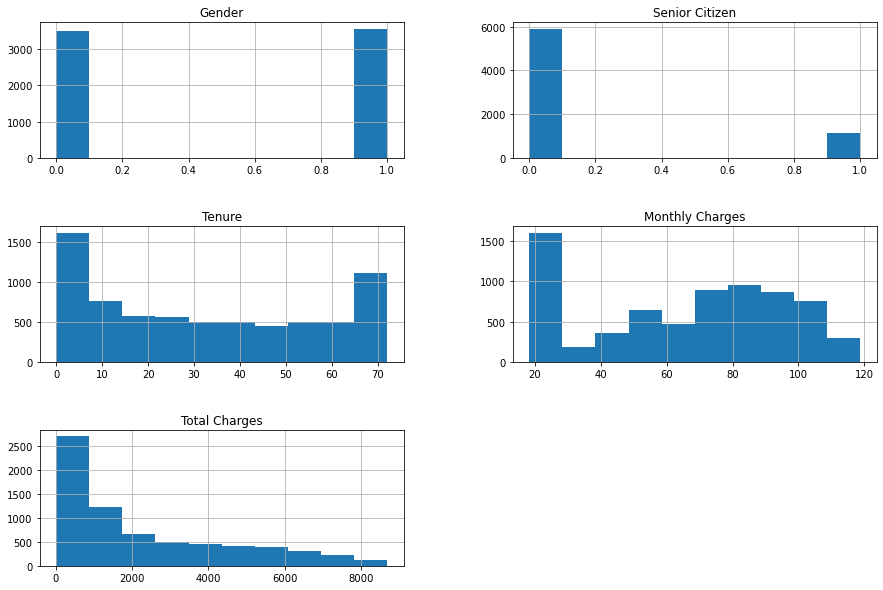

In [256]:
#Call churn_data's `hist` method to plot histograms of each of the numeric features
churn_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

**What features do we have possible cause for concern about and why?**
 - Senior Citizen because almost all values are 0 and there are a few 1. 
 - The 'Tenure' column contains values equal to 0.
 - The 'Total Charges' column contains values equal to 0.
 - Are there instances where 'Monthly Charges' exceed 'Total Charges'?
 - 'Total Charges' is highly skewed

##### 2.5.3.2.1 Senior Citizen <a id='2.5.3.2.1_Senior_Citizen'></a>

In [257]:
senior_churn_counts = churn_data_train.groupby(['Churn', 'Senior Citizen']).size().reset_index(name='Count')
print(senior_churn_counts)

  Churn  Senior Citizen  Count
0    No               0   4163
1    No               1    621
2   Yes               0   1280
3   Yes               1    435


This is reasonable, as the population of senior citizens is smaller than that of non-senior citizens.

##### 2.5.3.2.2 Tenure <a id='2.5.3.2.2_Tenure'></a>

In [258]:
zero_tenure = churn_data[churn_data['Tenure'] == 0]
zero_tenure

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
488,4472-LVYGI,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,1,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,0,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,0,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,0,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,NaN


We have missing values in 'Total Charges' where 'Tenure' is equal to 0, which likely indicates that these customers are new to the company's services.

In [259]:
# Tenure > 60
churn_data_train.loc[churn_data_train.Tenure > 60].groupby(['Churn']).size().reset_index(name='Count')

,Churn,Count
0,No,1216
1,Yes,85


##### 2.5.3.2.3 Total Charges <a id='2.5.3.2.3_Total_Charges'></a>

In [260]:
zero_total_charges = churn_data[churn_data['Total Charges'] == 0]
zero_total_charges

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn


##### 2.5.3.2.4 Monthly charges vs Total Charges <a id='2.5.3.2.4_Total_Monthly'></a>

In [261]:
month_total_charges = churn_data[churn_data['Total Charges'] < churn_data['Monthly Charges']]
month_total_charges

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn


No customer has 'Monthly Charges' greater than 'Total Charges'.

### 2.5.4 Missing Values <a id='2.5.4_Missing_values'></a>

In [262]:
missing_Total_Charges = churn_data_train[churn_data_train['Total Charges'].isnull()].groupby(['Churn']).size()\
    .reset_index(name='Count')
missing_Total_Charges

,Churn,Count
0,No,9


**Customers with missing values in 'Total Charges' have not churned.**

In [263]:
churn_data[churn_data['Total Charges'].isnull()][['Monthly Charges', 'Churn']]

,Monthly Charges,Churn
488,52.55,No
753,20.25,No
936,80.85,No
1082,25.75,No
1340,56.05,No
3331,19.85,No
3826,25.35,No
4380,20.00,No
5218,19.70,No
6670,73.35,NaN


In [264]:
# Calculate the mean of 'Monthly Charges' for records where 'Total Charges' is missing
missing_monthly_charges_mean = churn_data_train[churn_data_train['Total Charges'].isnull()]['Monthly Charges'].mean()
print(missing_monthly_charges_mean)

35.59444444444444


In [265]:
# Calculate the mean of 'Monthly Charges' for records where 'Total Charges' is not missing
not_missing_monthly_charges_mean = churn_data_train[churn_data_train['Total Charges'].notnull()]['Monthly Charges'].mean()

# Print the result
print(not_missing_monthly_charges_mean)

64.77375192604015


**The mean of 'Monthly Charges' for records with missing 'Total Charges' differs from that of records where 'Total Charges' is not missing.**

In [266]:
# Calculate the mod of 'Monthly Charges' for records where 'Total Charges' is missing
missing_monthly_charges = churn_data[churn_data['Total Charges'].isnull()]['Monthly Charges'].sort_values()

print(missing_monthly_charges)

5218    19.70
3331    19.85
4380    20.00
753     20.25
3826    25.35
1082    25.75
488     52.55
1340    56.05
6754    61.90
6670    73.35
936     80.85
Name: Monthly Charges, dtype: float64


In [267]:
filtered_data = churn_data[(churn_data['Total Charges'].notnull()) & 
                           (churn_data['Monthly Charges'] >= 19) & 
                           (churn_data['Monthly Charges'] <= 81)][['Total Charges', 'Monthly Charges']].sort_values('Total Charges')
print(filtered_data)

      Total Charges  Monthly Charges
583           19.00            19.00
1733          19.05            19.05
5336          19.10            19.10
3110          19.10            19.10
4348          19.10            19.10
...             ...              ...
2220        5753.25            79.35
3823        5763.15            78.85
2092        5810.90            79.55
4801        5824.75            80.85
6358        5886.85            80.45

[4509 rows x 2 columns]


**We can consider imputing missing 'Total Charges' values based on the corresponding 'Monthly Charges' within the same range.**

In [268]:
# Calculate the mean of 'Monthly Charges' for records where 'Total Charges' is missing
missing_monthly_charges_mean = churn_data[(churn_data['Total Charges'].notnull()) & 
                           (churn_data['Monthly Charges'] >= 19) & 
                           (churn_data['Monthly Charges'] <= 81)][['Total Charges']].mean()
print(missing_monthly_charges_mean)

Total Charges    1290.676724
dtype: float64


In [269]:
# Calculate the mean of 'Monthly Charges' for records where 'Total Charges' is missing
missing_monthly_charges_mean = churn_data[(churn_data['Total Charges'].notnull())][['Total Charges']].mean()
print(missing_monthly_charges_mean)

Total Charges    2283.300441
dtype: float64


Let's retain the missing values as they are for the time being. 

## 2.6 Save Data <a id='2.6_Save_Data'></a>

In [270]:
churn_data.shape

(7043, 21)

In [271]:
datapath = '../data'

if not os.path.exists(datapath):
    os.mkdir(datapath)

In [272]:
datapath_churndata = os.path.join(datapath, 'churn_data_cleaned.csv')
if not os.path.exists(datapath_churndata):
    churn_data.to_csv(datapath_churndata, index=False)

In [273]:
datapath_churndata = os.path.join(datapath, 'churn_data_train_cleaned.csv')
if not os.path.exists(datapath_churndata):
    churn_data_train.to_csv(datapath_churndata, index=False)

In [274]:
datapath_churndata = os.path.join(datapath, 'churn_data_train_cleaned.csv')
if not os.path.exists(datapath_churndata):
    churn_data_test.to_csv(datapath_churndata, index=False)

## 2.7 Summary <a id='2.7_Summary'></a>

The data wrangling process for the customer churn analysis project began with combining the 'train.csv' and 'test.csv' datasets, resulting in a comprehensive dataset. The original dataset contained 7043 rows. Key steps included handling missing values, identifying duplicates, and examining categorical and numeric features. 'Total Charges' had the highest proportion of missing values (0.13% in the training set and 0.36% in the test set), while no other columns had missing values. No duplicate 'CustomerID' values were found. Categorical feature analysis confirmed that 'Streaming TV' and 'Streaming Movies' values were identical. Numeric feature examination revealed issues such as the predominance of zeros in the 'Senior Citizen' column, zero values in 'Tenure' and 'Total Charges', and significant skewness in 'Total Charges'. Actions included validating that no 'Monthly Charges' exceeded 'Total Charges', analyzing missing data patterns, and filtering records for specific charge ranges. At the conclusion of data wrangling, 7043 rows remained, setting the stage for the modeling phase where the primary goal is to predict customer churn based on the cleaned and prepared data. The target feature for prediction is 'Churn', with the aim to provide actionable insights for improving customer retention.